In [1]:
using Flux, Flux.Data.MNIST, Images
using Flux: onehotbatch, argmax, crossentropy, throttle
using Base.Iterators: repeated, partition
using CuArrays

,,,,,,,,,

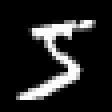
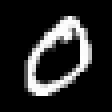
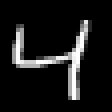
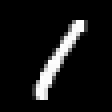
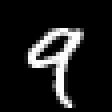
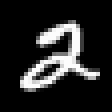
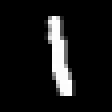
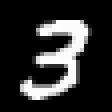
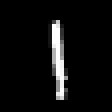
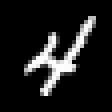

In [68]:
imgs = MNIST.images()

labels = collect(onehotbatch(MNIST.labels(), 0:9))

imgs[1:10]

In [69]:
# Partition into batches of size 1,000
train = [(cat(4, float.(imgs[i])...), labels[:,i])
         for i in partition(1:60_000, 1000)]

# Prepare test set (first 1,000 images)
tX = cat(4, float.(MNIST.images(:test)[1:1000])...)
tY = onehotbatch(MNIST.labels(:test)[1:1000], 0:9);

In [79]:
m = Chain(
  Conv2D((2,2), 1=>16, relu),
  x -> maxpool2d(x, 2),
  Conv2D((2,2), 16=>8, relu),
  x -> maxpool2d(x, 2),
  x -> reshape(x, :, size(x, 4)),
  Dense(288, 10), softmax)

loss(x, y) = crossentropy(m(x), y)

loss (generic function with 1 method)

In [80]:
if isdefined(:CuArrays)
    m = cu(m)
    train = cu.(train)
    labels = cu(labels)
    tX, tY = cu((tX, tY))
end;

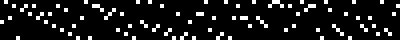

In [81]:
Gray.(collect(labels[:,1:100]))

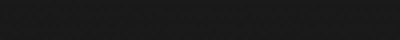

In [82]:
Gray.(collect(m(train[1][1]).data)[:,1:100])

In [83]:
evalcb = throttle(5) do
    display(Gray.(collect(m(train[1][1]).data)[:,1:100]))
end

(::throttled) (generic function with 1 method)

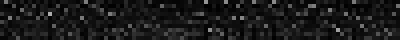

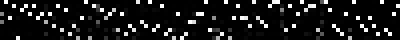

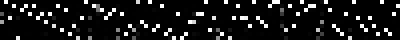

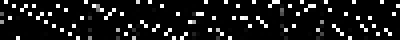

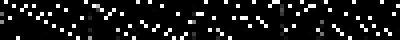

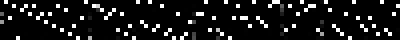

In [84]:
for i = 1:50
    Flux.train!(loss, train, ADAM(params(m)))
    evalcb()
end

Test set accuracy.

In [93]:
mean(argmax(m(tX)) .== argmax(tY))

0.972

In [96]:
gc(); CuArrays.clearpool()